## Initial EDA

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
sns.set_style("dark")
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import pickle
import re


In [155]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [156]:
# Set initial feature 
train_feature = train.columns[:-1]
train_feature
train.columns
#train[train_feature].head(5)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [61]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/hellothere/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


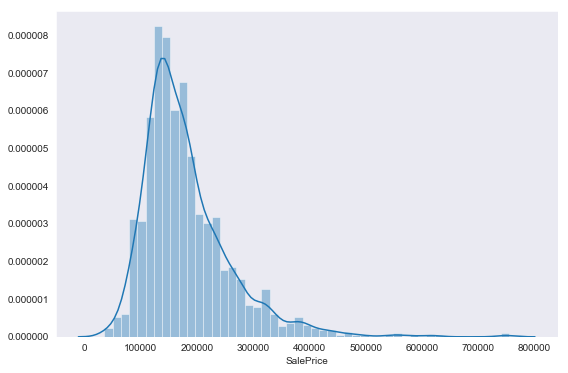

In [62]:
plt.figure(figsize=(9, 6))
sns.distplot(y_pred)    

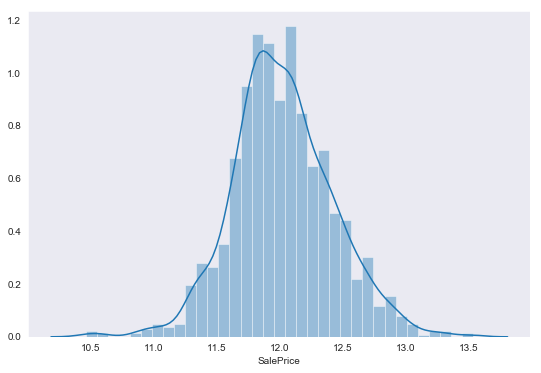

In [41]:
plt.figure(figsize=(9, 6))
sns.distplot(np.log1p(y_pred));

In [65]:
y_train_values = np.log1p(train["SalePrice"]).values

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

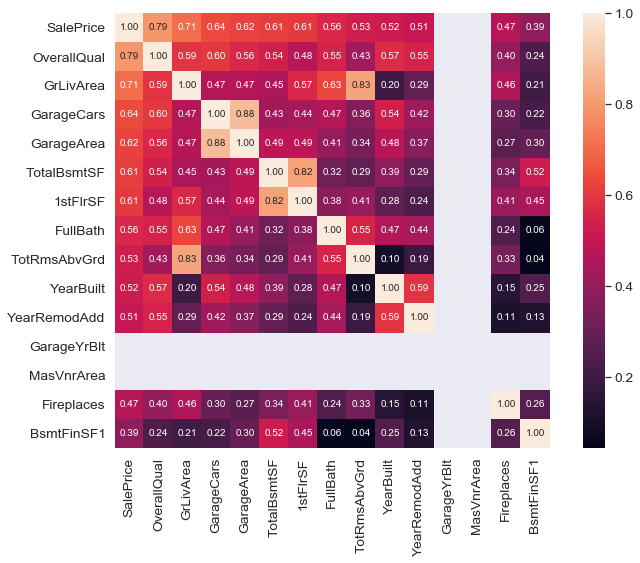

In [70]:
## check correlation 
## zoomed heatmap style
corrmat = train.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


## GarageCars & GagageArea has Multicollinearity so take 1 feature 

In [224]:
df = pd.DataFrame({'A': [1, 2, 1, 2, 1, 2, 3]})
df.mode()

,A
0,1
1,2


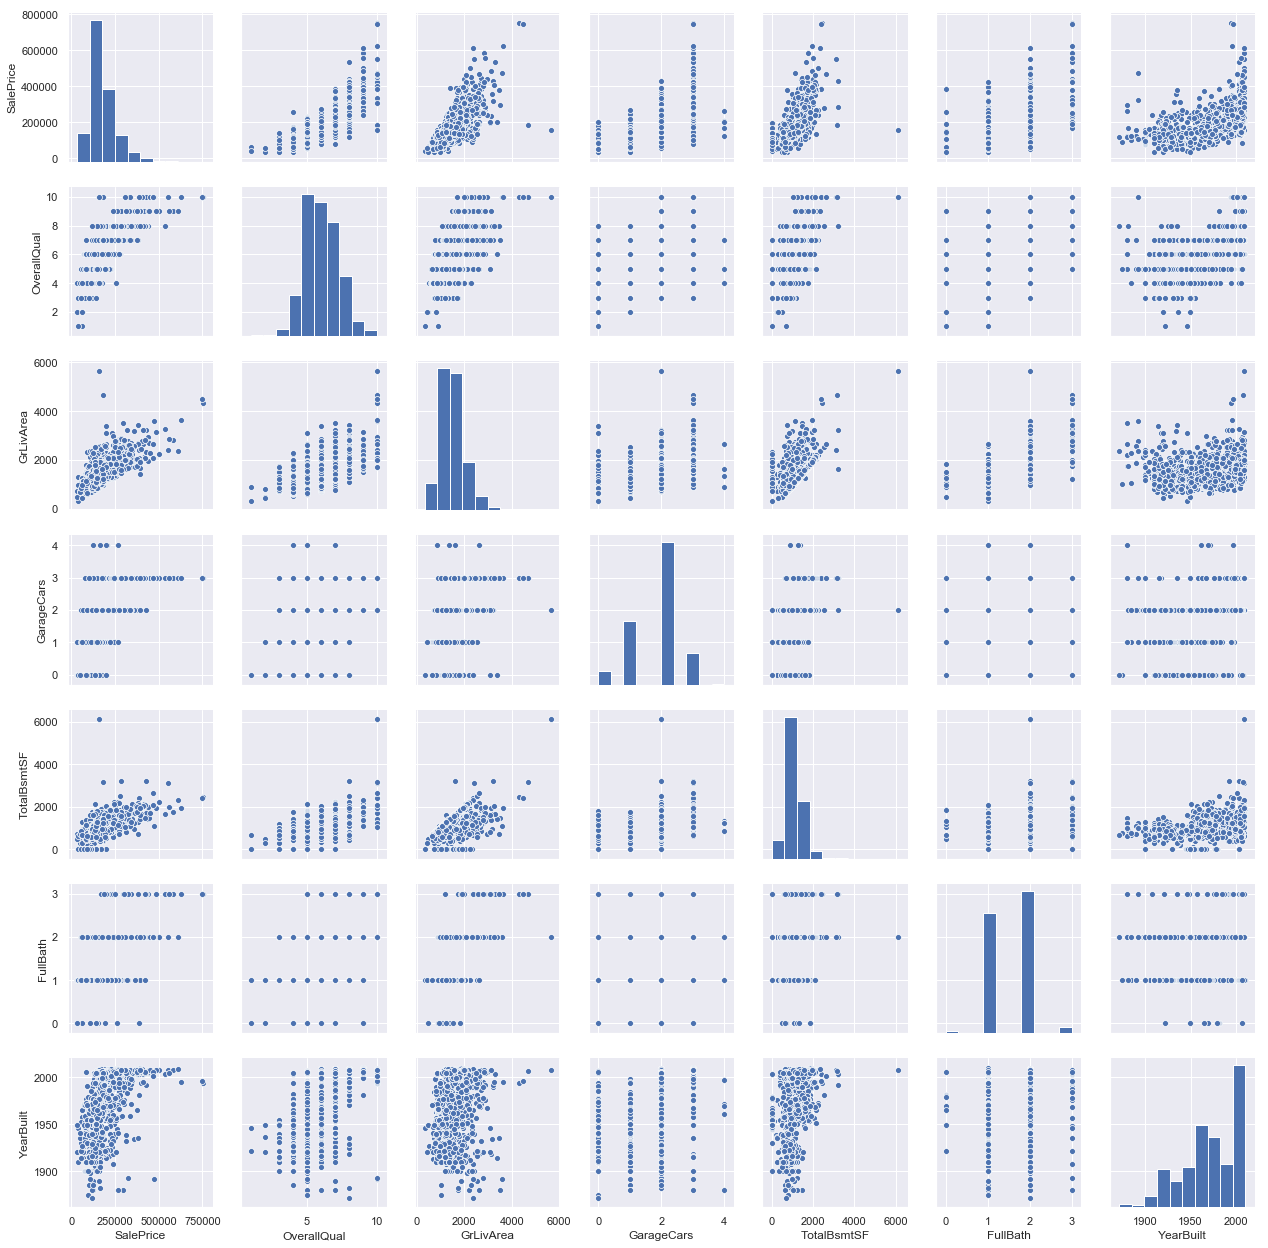

In [73]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

## Missing 

In [97]:
#missing data
combined_data = pd.concat((train, test))

total = combined_data.isnull().sum().sort_values(ascending=False)
percent = (combined_data.isnull().sum()/combined_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
features_to_drop = missing_data[missing_data['Percent'] > 0.4].index
features_to_drop
    
# features_to_drop = features_to_drop.union(['GarageArea'])
# features_to_drop
#print(missing_data.head(5).index)

/Users/hellothere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'SalePrice', 'FireplaceQu'], dtype='object')

## Time series 

,YearBuilt,SalePrice
0,2003,208500
1,1976,181500
2,2001,223500
3,1915,140000
4,2000,250000


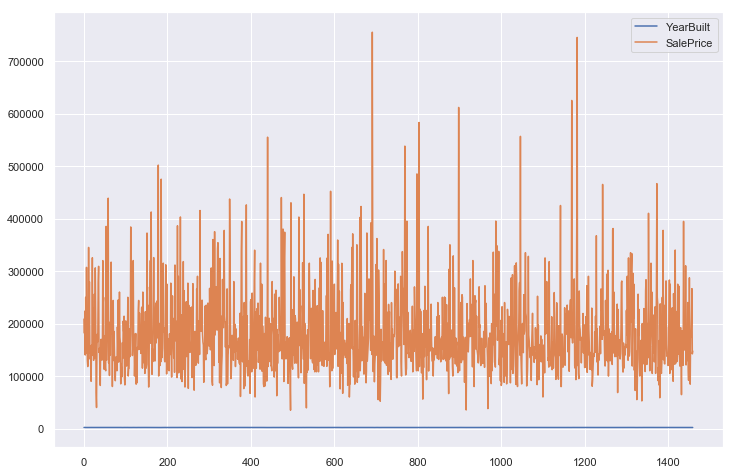

In [104]:
series = train[['YearBuilt','SalePrice']]
series.plot()


#pyplot.show()
series.head()

In [159]:
series = train[['YearBuilt','SalePrice']]
#sns.boxplot(train['YearBuilt'],train['SalePrice'])


train.groupby(['YearBuilt']).agg('count')
#train['YearBuilt','SalePrice'].groupby(['YearBuilt','SalePrice']).agg('mean')
train[['YearBuilt','SalePrice']].groupby(['YearBuilt']).agg('mean')
#train[['YearBuilt','YrSold','SalePrice']]

#train[['YrSold','SalePrice']].groupby(['YrSold']).agg('mean')

## year build = good 
## year sole = not good just us 

#train[['GarageCars' ,'GarageArea']]
#train.columns

,SalePrice
YearBuilt,
1872,122000.000000
1875,94000.000000
1880,200619.750000
1882,168000.000000
1885,111250.000000
1890,142200.000000
1892,291250.000000
1893,325000.000000
1898,106000.000000


##  house Size relationship

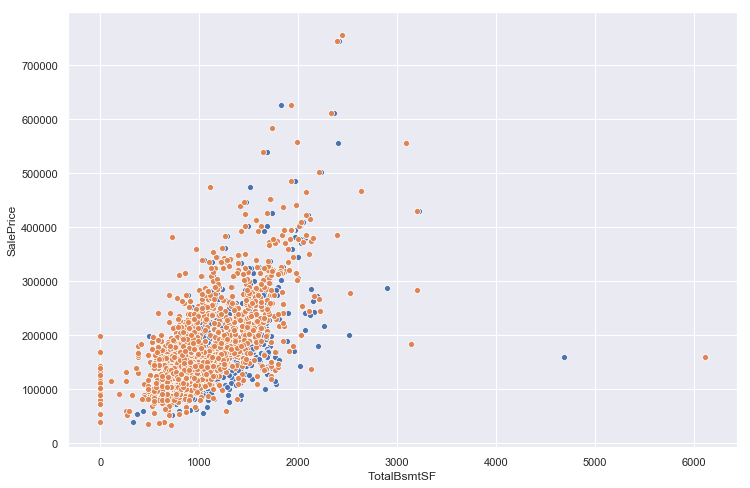

In [207]:
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
    
df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']]
#sum_of_flr = df['1stFlrSF'] + df['2ndFlrSF']
#mydata['TotalBsmtSF'] 
# sum_of_all_flr = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
# #sns.scatterplot(sum_of_flr,df['SalePrice'])
# #corr
# sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'])
#sns.scatterplot(sum_of_flr,df['SalePrice'])
#sns.scatterplot(sum_of_all_flr,df['SalePrice'])


df['is2nd'] = (df['2ndFlrSF']> 0) * 1 
#df['is2nd']

#sns.scatterplot(df['is2nd'],df['SalePrice']) ## 2층 여부는 상관없는듯 

sns.scatterplot(df['1stFlrSF'],df['SalePrice'])
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'])

In [208]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
7        TA
8        TA
9        TA
10      NaN
11       Gd
12      NaN
13       Gd
14       Fa
15      NaN
16       TA
17      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
24       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
       ... 
1430     Gd
1431    NaN
1432    NaN
1433     TA
1434     Gd
1435     Gd
1436    NaN
1437     Gd
1438    NaN
1439     TA
1440     Gd
1441     TA
1442     Ex
1443     Gd
1444    NaN
1445    NaN
1446    NaN
1447     TA
1448    NaN
1449    NaN
1450    NaN
1451     Gd
1452    NaN
1453    NaN
1454    NaN
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [219]:
#df.groupby('FireplaceQu').agg('count').size()
df.groupby(['FireplaceQu']).size()

FireplaceQu
Ex     24
Fa     33
Gd    380
Po     20
TA    313
dtype: int64

In [39]:
for col in ord_df.columns:
    if ord_df[col].dtype == 'float64':
        ord_df[col] = ord_df[col].apply(lambda x: 0 if pd.isnull(x) else x)
        ord_df[col] = ord_df[col].apply(int)

In [40]:
ord_list = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'Functional', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'PavedDrive']
ord_df[ord_list].isnull().any()

LotShape        False
LandSlope       False
OverallQual     False
OverallCond     False
ExterQual       False
ExterCond       False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
HeatingQC       False
KitchenQual     False
FireplaceQu     False
Functional      False
GarageQual      False
GarageCond      False
PoolQC          False
BsmtFinType1    False
BsmtFinType2    False
GarageFinish    False
PavedDrive      False
dtype: bool

In [43]:
ord_df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NaN,4,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,Attchd,2003,2,2,548,3,3,2,0,61,0,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NaN,4,Lvl,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,Attchd,1976,2,2,460,3,3,2,298,0,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NaN,3,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,Attchd,2001,2,2,608,3,3,2,0,42,0,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NaN,3,Lvl,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,Detchd,1998,1,3,642,3,3,2,0,35,272,0,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NaN,3,Lvl,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,Attchd,2000,2,3,836,3,3,2,192,84,0,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NaN,3,Lvl,Inside,3,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,3,3,Wood,4,3,1,6,732,1,0,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,7,0,0,Attchd,1993,1,2,480,3,3,2,40,30,0,320,0,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NaN,4,Lvl,Inside,3,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,4,3,PConc,5,3,3,6,1369,1,0,317,1686,GasA,5,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,7,1,4,Attchd,2004,2,2,636,3,3,2,255,57,0,0,0,0,0,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,0,10382,Pave,NaN,3,Lvl,Corner,3,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,3,3,CBlock,4,3,2,5,859,4,32,216,1107,GasA,5,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,7,2,3,Attchd,1973,2,2,484,3,3,2,235,204,228,0,0,0,0,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NaN,4,Lvl,Inside,3,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,3,3,BrkTil,3,3,1,1,0,1,0,952,952,GasA,4,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,6,2,3,Detchd,1931,1,2,468,2,3,2,90,0,205,0,0,0,0,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [44]:
preserved_mapper_MoSold = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
ord_df['MoSold'] = ord_df.MoSold.replace(preserved_mapper_MoSold)

In [46]:
transformed = ord_df.copy()
X = pd.get_dummies(transformed.iloc[:, transformed.columns != 'SalePrice'], drop_first=True, dummy_na=True)
y = transformed.SalePrice
X

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,MoSold_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65,8450,4,3,7,5,2003,2003,196,4,3,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,2003,2,2,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,20,80,9600,4,3,6,8,1976,1976,0,3,3,4,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,1976,2,2,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,60,68,11250,3,3,7,5,2001,2002,162,4,3,4,3,2,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,2001,2,2,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,70,60,9550,3,3,7,5,1915,1970,0,3,3,3,4,1,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,1998,1,3,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,60,84,14260,3,3,8,5,2000,2000,350,4,3,4,3,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,2000,2,3,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6,50,85,14115,3,3,5,5,1993,1995,0,3,3,4,3,1,6,732,1,0,64,796,5,796,566,0,1362,1,0,1,1,1,1,3,5,7,0,0,1993,1,2,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
7,20,75,10084,4,3,8,5,2004,2005,186,4,3,5,3,3,6,1369,1,0,317,1686,5,1694,0,0,1694,1,0,2,0,3,1,4,7,7,1,4,2004,2,2,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,60,0,10382,3,3,7,6,1973,1973,240,3,3,4,3,2,5,859,4,32,216,1107,5,1107,983,0,2090,1,0,2,1,3,1,3,7,7,2,3,1973,2,2,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,50,51,6120,4,3,7,5,1931,1950,0,3,3,3,3,1,1,0,1,0,952,952,4,1022,752,0,1774,0,0,2,0,2,2,3,8,6,2,3,1931,1,2,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
 X.to_csv('./data/transformed_train.csv')

In [ ]:
#histogram
sns.distplot(df[''],df['SalePrice'],);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


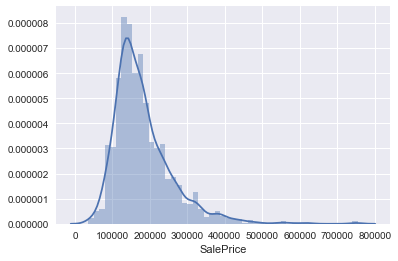

In [26]:
#histogram
sns.distplot(df['SalePrice']);

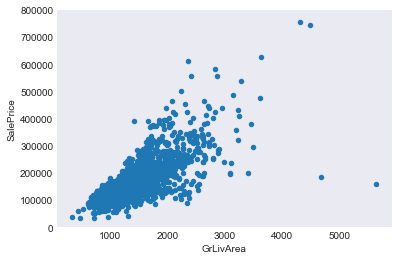

In [13]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


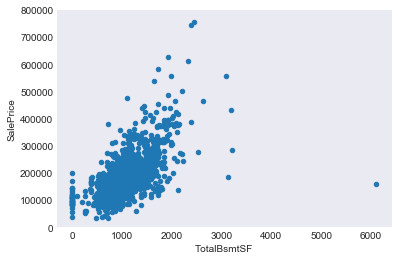

In [15]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


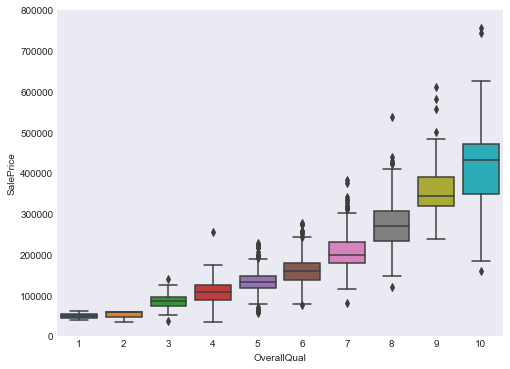

In [17]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


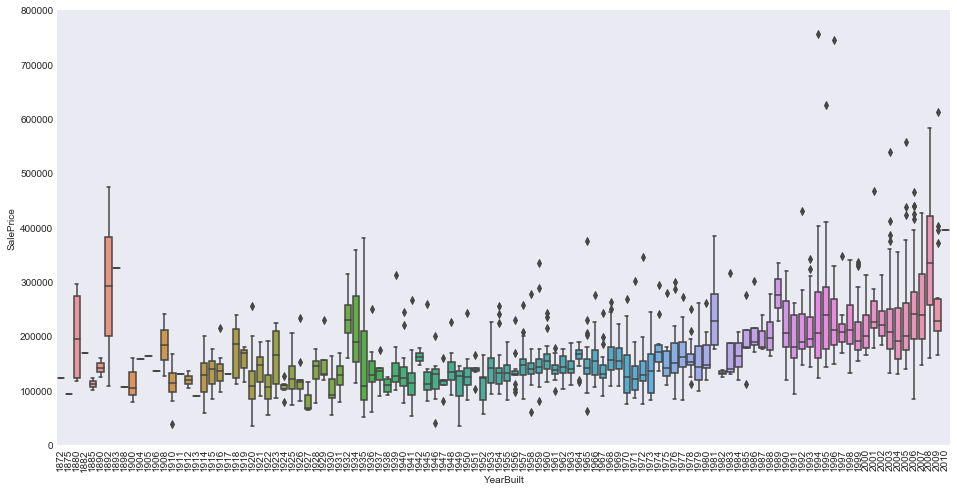

In [19]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

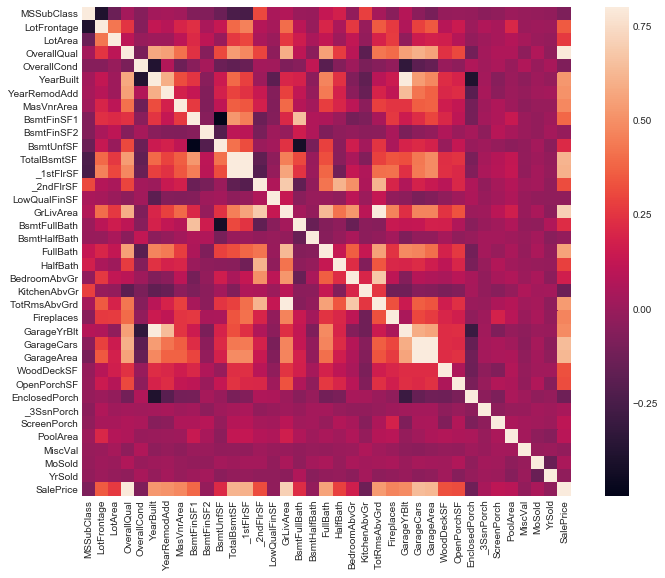

In [20]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

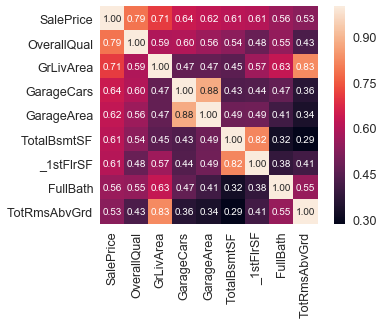

In [23]:
#saleprice correlation matrix
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

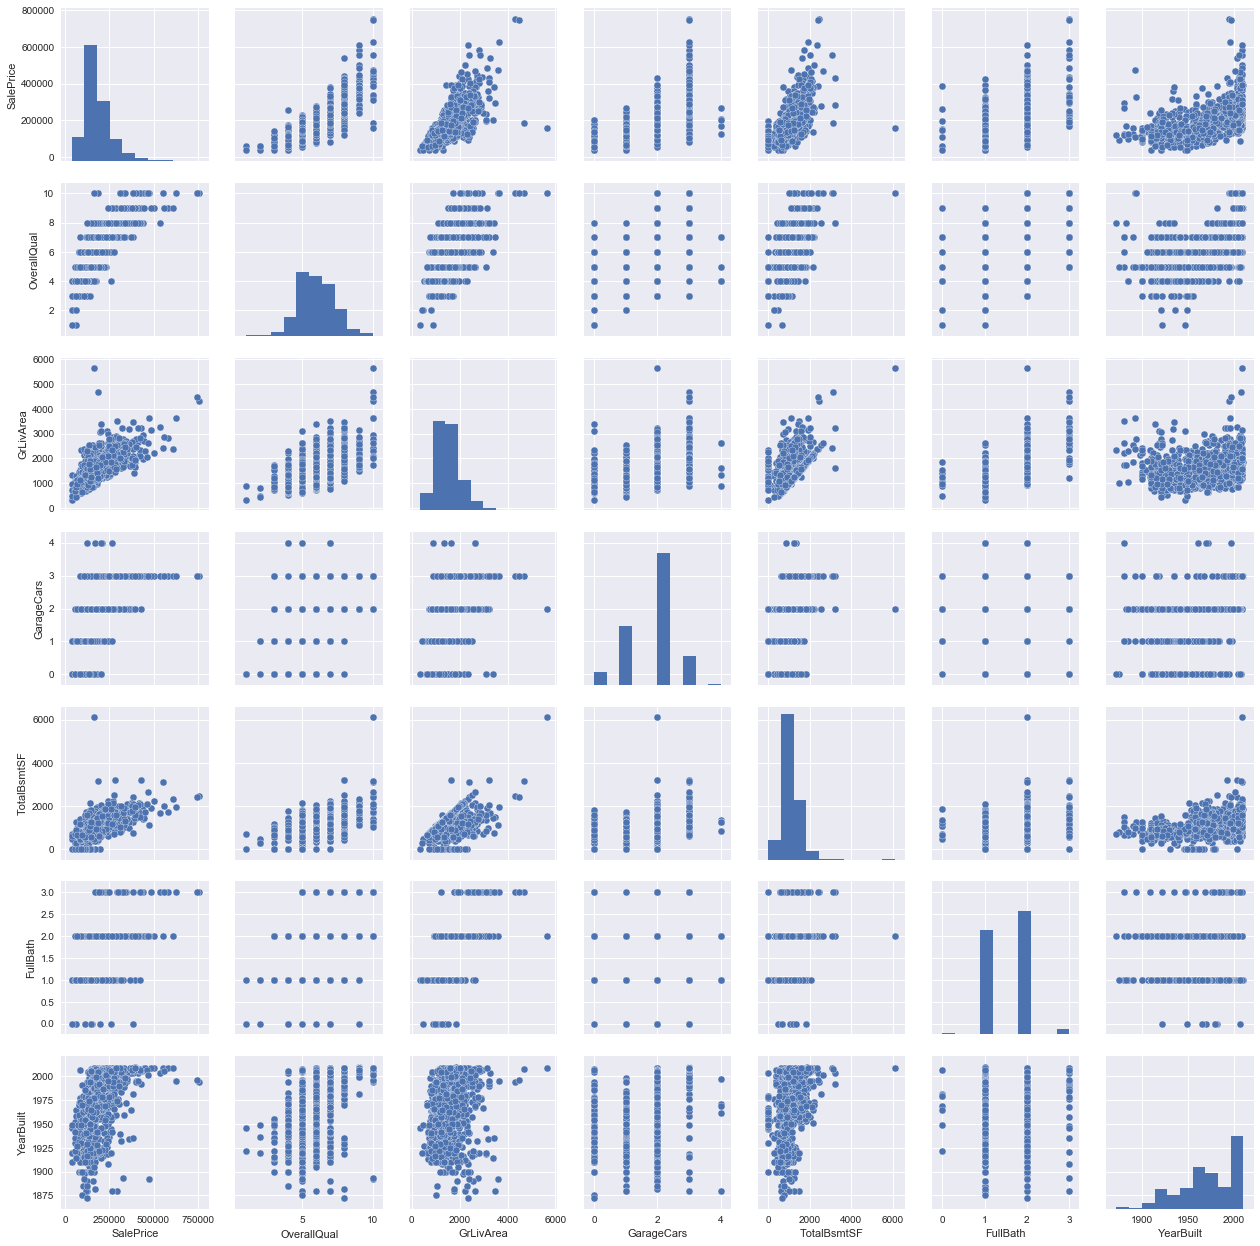

In [25]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();